<a href="https://colab.research.google.com/github/NP-15/Machine-learning/blob/main/Sessions/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all necessary data and setting up the dataset

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#importing dataset using panda
df = pd.read_csv('/content/drive/MyDrive/Machine-learning-main/assets/emissions.csv')
#to see what my dataset is comprised of
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


## Data pre-processing

In [17]:
print(df.dtypes)

Car       object
Model     object
Volume     int64
Weight     int64
CO2        int64
dtype: object


In [18]:
print(df.isnull().any())

Car       False
Model     False
Volume    False
Weight    False
CO2       False
dtype: bool


In [19]:
df = df.drop(['Car', 'Model'], axis=1)

<Axes: >

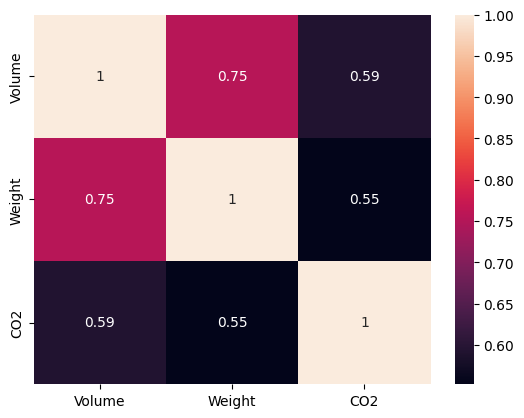

In [20]:
sns.heatmap(df.corr(), annot=True)

## Pair plot to check correlation

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


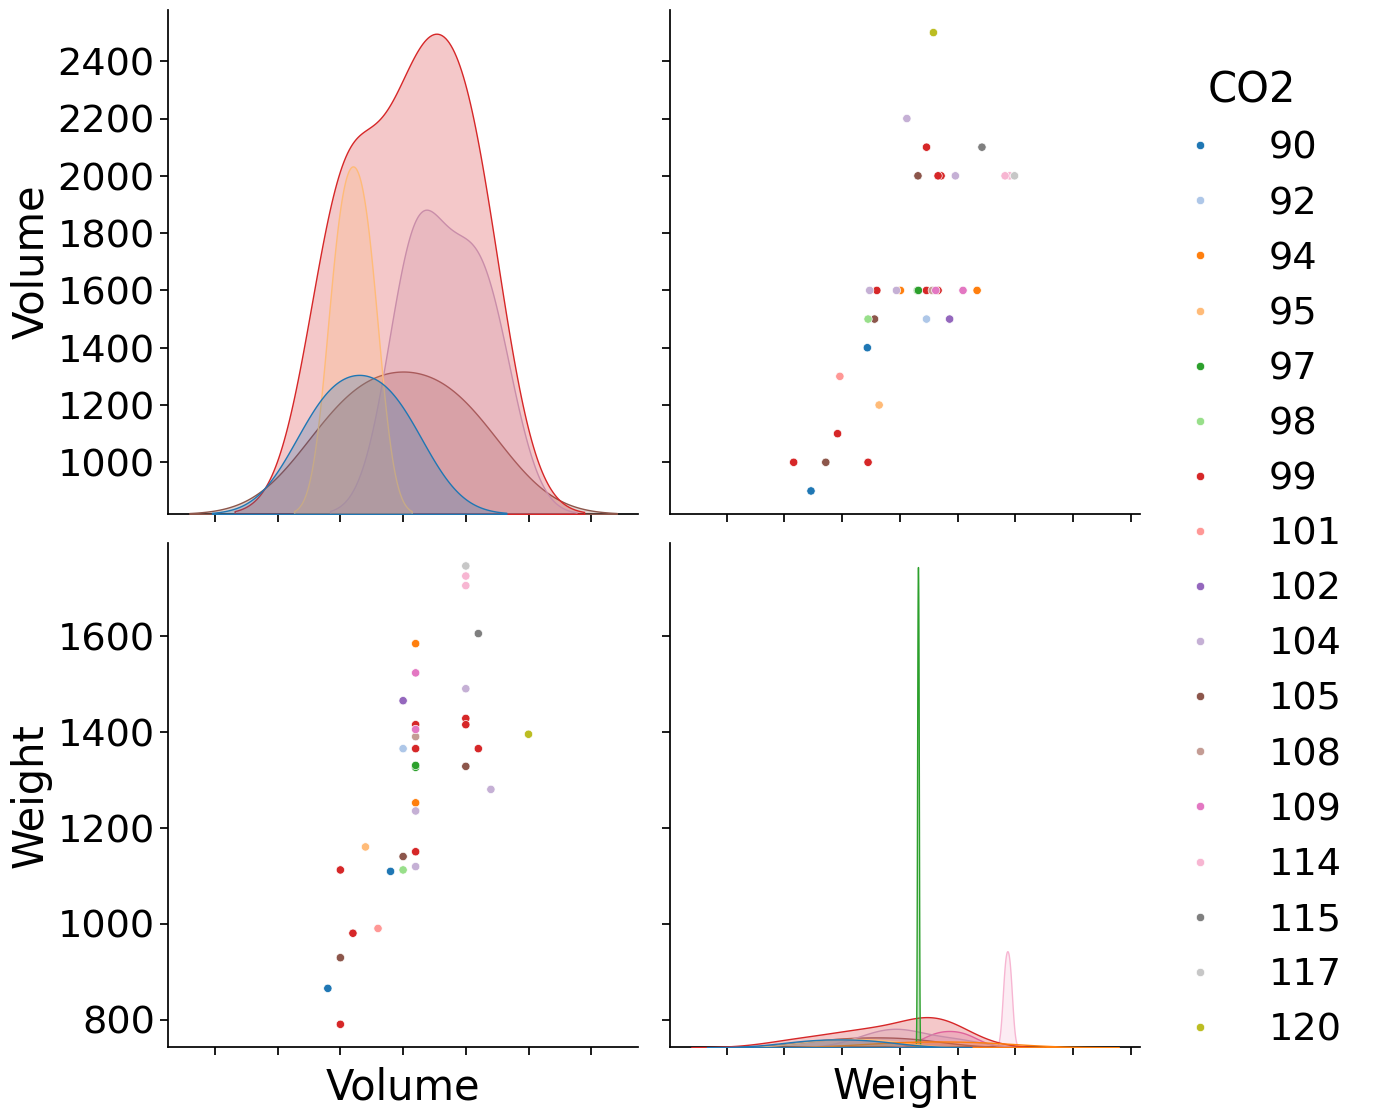

In [21]:
with sns.plotting_context("notebook", font_scale=2.5):
    g = sns.pairplot(
        df[['Volume', "Weight", "CO2"]],
        hue="CO2",
        palette='tab20',
        size=6
    )

g.set(xticklabels=[]);

In [22]:
#separating independent and dependent variable
X = df.iloc[:,0:-1].values
y = df.iloc[:,2].values

#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Intercept: ", regressor.intercept_)

y_pred = regressor.predict(X_test)

Intercept:  87.76296861622906


## Prediction y-values

In [24]:
print(y_pred)

[105.0294035  102.85078349 101.35958656 104.33820351 102.70401508
 101.12126741  97.39364743  96.77749669  97.99951003 104.75022964
 104.88641201 103.98383146]


# Running tests

### Hypthesis Testing

In [25]:
from scipy.stats import f_oneway

for x_col in df.columns:
    for y_col in df.columns:
        if x_col != y_col:
            statistic, p_value = f_oneway(df[x_col], df[y_col])

            print(f"Hypothesis testing for {x_col} and {y_col}:")
            print(f"    F-statistic: {statistic}")
            print(f"    p-value: {p_value}")
            print()

Hypothesis testing for Volume and Weight:
    F-statistic: 17.43269810237954
    p-value: 8.438329042499733e-05

Hypothesis testing for Volume and CO2:
    F-statistic: 541.6590227228711
    p-value: 1.1325528065012124e-34

Hypothesis testing for Weight and Volume:
    F-statistic: 17.43269810237954
    p-value: 8.438329042499733e-05

Hypothesis testing for Weight and CO2:
    F-statistic: 869.144763884433
    p-value: 3.3648693819073204e-41

Hypothesis testing for CO2 and Volume:
    F-statistic: 541.6590227228711
    p-value: 1.1325528065012124e-34

Hypothesis testing for CO2 and Weight:
    F-statistic: 869.1447638844346
    p-value: 3.364869381907101e-41



### ANOVA test
Using the scipy inbuilt command. The p value is ideally 0.05, so if the final p value is less than that, the dataset is ideal for multi-linear regression.

In [26]:
from scipy.stats import f_oneway

statistic, p_value = f_oneway(df['Weight'], df['Volume'], df['CO2'])

table_data = {
    'Source of Variation': ['Between Groups', 'Within Groups', 'Total'],
    'Degrees of Freedom': [len(df.columns) - 1, len(df) * len(df.columns) - len(df.columns), len(df) * len(df.columns) - 1],
    'Sum of Squares': [None, None, None],
    'Mean Square': [None, None, None],
    'F': [statistic, None, None],
    'p-value': [p_value, None, None]
}

# Calculate sum of squares
total_mean = df.values.mean()
between_groups_squares = sum([(df[group].mean() - total_mean) ** 2 for group in df.columns]) * len(df)
within_groups_squares = sum([sum((df[group] - df[group].mean()) ** 2) for group in df.columns])
total_squares = between_groups_squares + within_groups_squares

table_data['Sum of Squares'][0] = between_groups_squares
table_data['Sum of Squares'][1] = within_groups_squares
table_data['Sum of Squares'][2] = total_squares

# Calculate mean square
table_data['Mean Square'][0] = table_data['Sum of Squares'][0] / table_data['Degrees of Freedom'][0]
table_data['Mean Square'][1] = table_data['Sum of Squares'][1] / table_data['Degrees of Freedom'][1]

# Display the table
result_table = pd.DataFrame(table_data)
print(result_table)

  Source of Variation  Degrees of Freedom  Sum of Squares   Mean Square  \
0      Between Groups                   2    4.554819e+07  2.277409e+07   
1       Within Groups                 105    7.349340e+06  6.999371e+04   
2               Total                 107    5.289753e+07           NaN   

            F       p-value  
0  325.373422  9.946727e-46  
1         NaN           NaN  
2         NaN           NaN  


### Variation Inflation Test (VIF)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X, i) for i in range(2)]

print(vif)

[43.09465920532496, 43.09465920532496]


The p-value being less than 0.05 and the collinearity being high and same indicate the given dataset can be implemented using multilinear regression and the columns are correctly identified.

## Finding the best values and re-plotting

ANOVA Test Result:
F-value: 325.3734223200118
p-value: 9.946727365037715e-46

F-test Result for Weight:
F-value: 14.91169044577191
p-value: 0.6951303398048692

F-test Result for Volume:
F-value: 18.352864905134158
p-value: 0.6494391483944497
R-squared value: 0.3765564043619989
Adjusted R-squared value: 0.33877194402030186


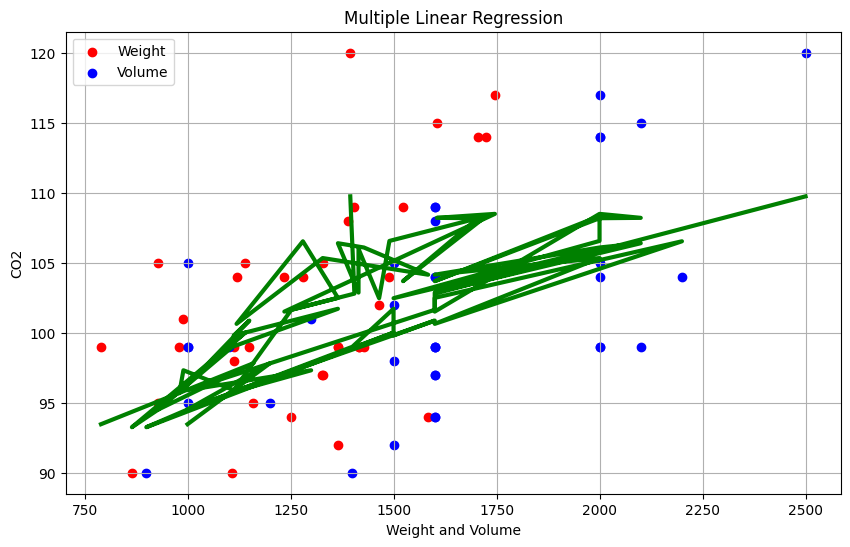

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, linregress
from sklearn.linear_model import LinearRegression

# Perform ANOVA test
anova_result = f_oneway(df['Weight'], df['Volume'], df['CO2'])
print("ANOVA Test Result:")
print("F-value:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

# Perform F-test
reg = LinearRegression().fit(df[['Weight']], df['CO2'])
r_squared_weight = reg.score(df[['Weight']], df['CO2'])
f_value_weight = (r_squared_weight / (1 - r_squared_weight)) * ((len(df) - 2) / 1)
p_value_weight = 1 - reg.score(df[['Weight']], df['CO2'])
print("\nF-test Result for Weight:")
print("F-value:", f_value_weight)
print("p-value:", p_value_weight)

reg = LinearRegression().fit(df[['Volume']], df['CO2'])
r_squared_volume = reg.score(df[['Volume']], df['CO2'])
f_value_volume = (r_squared_volume / (1 - r_squared_volume)) * ((len(df) - 2) / 1)
p_value_volume = 1 - reg.score(df[['Volume']], df['CO2'])
print("\nF-test Result for Volume:")
print("F-value:", f_value_volume)
print("p-value:", p_value_volume)

# Select columns with the best relation
best_columns = ['Weight', 'Volume']

# Plot multiple linear regression
X = df[best_columns]
y = df['CO2']
reg = LinearRegression().fit(X, y)

# Calculate R-squared value
r_squared = reg.score(X, y)

# Calculate Adjusted R-squared value
n = len(df)
k = len(best_columns)
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

print("R-squared value:", r_squared)
print("Adjusted R-squared value:", adjusted_r_squared)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Weight'], df['CO2'], color='red', label='Weight')
plt.scatter(df['Volume'], df['CO2'], color='blue', label='Volume')
plt.plot(df['Weight'], reg.predict(X), color='green', linewidth=3)
plt.plot(df['Volume'], reg.predict(X), color='green', linewidth=3)
plt.xlabel('Weight and Volume')
plt.ylabel('CO2')
plt.title('Multiple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()